In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier as randomforest
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
traindf=pd.read_csv("train.csv")
valdf=pd.read_csv("val.csv")
testdf=pd.read_csv("test.csv")

In [3]:
xtrain=traindf.drop("raintomorrow", axis=1)
ytrain=traindf["raintomorrow"]

xval=valdf.drop("raintomorrow", axis=1)
yval=valdf["raintomorrow"]

xtest=testdf.drop("raintomorrow", axis=1)
ytest=testdf["raintomorrow"]

In [4]:
base_model=randomforest(n_jobs=-1,random_state=42)

In [5]:
base_model.fit(xtrain,ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
train_acc=base_model.score(xtrain,ytrain)
val_acc=base_model.score(xval,yval)
test_acc=base_model.score(xtest,ytest)
print(f'train acc:{train_acc}\n val acc:{val_acc}\n test acc:{test_acc}')

train acc:0.9999693840062048
 val acc:0.8567499561121189
 test acc:0.8457020614546868


In [7]:
len(base_model.estimators_)

100

In [8]:
importance_df=pd.DataFrame({'feature':xtrain.columns,
                            'importance':base_model.feature_importances_}).sort_values('importance',ascending=False)

In [9]:
importance_df.head(8)

,feature,importance
9,humidity3pm,0.129273
4,sunshine,0.059835
11,pressure3pm,0.053178
8,humidity9am,0.051036
10,pressure9am,0.049215
5,windgustspeed,0.047183
2,rainfall,0.046710
15,temp3pm,0.046196


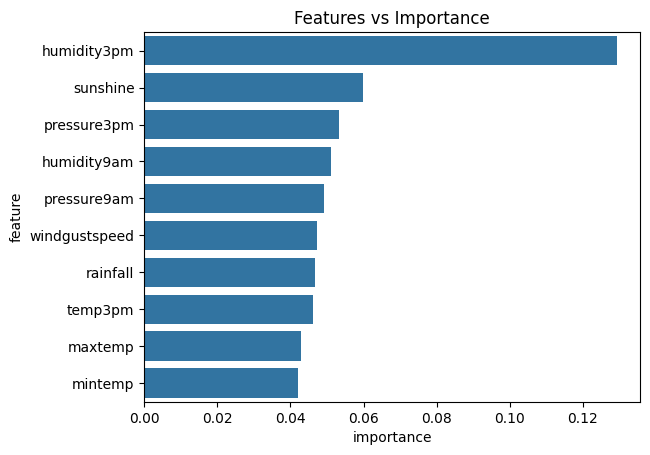

In [10]:
sns.barplot(x='importance',y='feature',data=importance_df.head(10));
plt.title('Features vs Importance');

In [14]:

#param_grid = {
#'max_depth': [None,5,7, 10, 20],
#'max_features': ['sqrt', 'log2',3,6],
    #'min_samples_split': [2, 5],
    #'min_samples_leaf': [1, 2],
   # 'bootstrap': [True, False]
#}
#model_1= randomforest(n_jobs=-1,random_state=42)
#grid_search = GridSearchCV(estimator=model_1, param_grid=param_grid,cv=5, scoring='accuracy', n_jobs=-1)
#grid_search.fit(xtrain, ytrain)
#print("Best Parameters:", grid_search.best_params_)
#print("Best CV Accuracy:", grid_search.best_score_)

In [16]:
%%time
model_1=randomforest(n_jobs=-1 , random_state=42 , n_estimators=125).fit(xtrain,ytrain)

CPU times: total: 1min 8s
Wall time: 6.73 s


In [17]:
def test_params(**params):
    model=randomforest(n_jobs=-1,random_state=42,**params).fit(xtrain,ytrain)
    return model.score(xtrain,ytrain),model.score(xval,yval)

In [18]:
test_params(max_features='log2')

(0.9999795893374699, 0.8565158874129557)

In [19]:
test_params(max_features=3)

(0.9999795893374699, 0.8551114752179765)

In [20]:
test_params(max_depth=7)

(0.8393170592317427, 0.8380244601790625)

In [23]:
test_params(max_features='log2',max_depth=25)

(0.9588521043393069, 0.8553455439171397)

In [24]:
test_params(max_features='log2',max_depth=25,min_impurity_decrease=1e-6)

(0.9408396946564885, 0.8552870267423489)

In [25]:
test_params(max_features='log2',max_depth=25,min_impurity_decrease=1e-2)

(0.7775441890843777, 0.7906255485985136)

In [26]:
test_params(min_samples_split=5,min_samples_leaf=2)

(0.9570763766991877, 0.8553455439171397)

In [27]:
test_params(min_samples_split=10,min_samples_leaf=10)

(0.8798832510103278, 0.8537070630229973)

In [29]:
ytrain.value_counts()

raintomorrow
No     76190
Yes    21798
Name: count, dtype: int64

In [30]:
test_params(class_weight='balanced')

(0.9999795893374699, 0.8558721984902569)

In [32]:
model_3=randomforest(n_jobs=-1,
                     random_state=42,
                     n_estimators=125,
                     max_features='log2',
                     max_depth=25,
                     min_impurity_decrease=1e-6
                     ,class_weight='balanced')

In [33]:
model_3.fit(xtrain,ytrain)

,n_estimators,125
,criterion,'gini'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,1e-06
,bootstrap,True
,oob_score,False


In [34]:
model_3.score(xval,yval)

0.8513663760313652

In [35]:
model_4=randomforest(n_jobs=-1,
                     random_state=42,
                     max_features='log2',
                     max_depth=25,
                     min_impurity_decrease=1e-6,
                     n_estimators=125)

In [36]:
%%time
model_4.fit(xtrain,ytrain)

CPU times: total: 40.2 s
Wall time: 4.03 s


,n_estimators,125
,criterion,'gini'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,1e-06
,bootstrap,True
,oob_score,False


In [37]:
model_4.score(xval,yval)

0.8551699923927673

In [38]:
test_pred=model_4.predict(xtest)

In [43]:
model_4.score(xtest,ytest)

0.8433683391676391

Accuracy: 84.34%


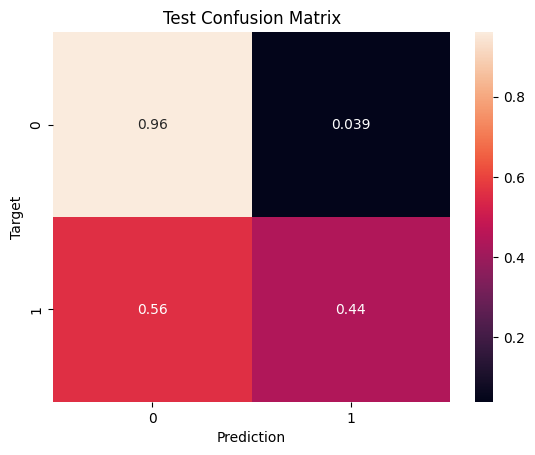

In [44]:
preds=model_4.predict(xtest)
accuracy=accuracy_score(ytest,preds)
print(f'Accuracy: {(accuracy*100):.2f}%')
cf=confusion_matrix(ytest,preds,normalize='true');
plt.figure();
sns.heatmap(cf,annot=True,);
plt.xlabel('Prediction');
plt.ylabel('Target');
plt.title('Test Confusion Matrix');

In [39]:
report = classification_report(ytest,test_pred)


In [42]:
print(report)

              precision    recall  f1-score   support

          No       0.85      0.96      0.90     19885
         Yes       0.77      0.44      0.56      5825

    accuracy                           0.84     25710
   macro avg       0.81      0.70      0.73     25710
weighted avg       0.84      0.84      0.83     25710

